# Importing libraries



In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import keras
from IPython.display import Image, display

# Load Dataset

In [10]:

data = pd.read_csv('TROPICAL_CYCLONE_DATASET.csv')

In [11]:
data

,NUMBER,BASIN,SUBBASIN,ISO_TIME,NATURE,LAT,LON,DIST2LAND,LANDFALL,STORM_SPEED,STORM_DIR,WIND,PRESSURE
0,22,0,6,1876-10-04 15:00:00,5,11.4783,-87.1501,83,83,10,256,55,0
1,22,0,6,1876-10-04 18:00:00,5,11.3667,-87.6333,124,124,10,260,50,0
2,22,0,6,1876-10-04 21:00:00,5,11.3158,-88.1166,164,164,10,266,50,0
3,22,0,6,1876-10-05 00:00:00,5,11.3000,-88.6200,203,203,10,269,50,0
4,22,0,6,1876-10-05 03:00:00,5,11.2951,-89.1250,215,215,10,270,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367136,18,2,6,02-06-2023 21:00,3,30.2854,136.5230,352,350,28,75,37,983
367137,18,2,6,03-06-2023 00:00,3,30.7000,138.1000,370,359,27,65,35,984
367138,18,2,6,03-06-2023 03:00,3,31.4463,139.3550,361,291,26,49,35,984
367139,18,2,6,03-06-2023 06:00,3,32.4000,140.4000,282,0,26,43,35,984


#  Drop Rows with 0's in WIND and PRESSURE

In [12]:
data.drop(data[data['WIND']==0].index,inplace=True)

In [13]:
data.drop(data[data['PRESSURE']==0].index,inplace=True)

In [14]:
data

,NUMBER,BASIN,SUBBASIN,ISO_TIME,NATURE,LAT,LON,DIST2LAND,LANDFALL,STORM_SPEED,STORM_DIR,WIND,PRESSURE
14225,4,1,4,18-01-1907 00:00,5,-13.1083,146.430,239,205,8,209,40,994
14235,4,1,4,19-01-1907 00:00,5,-15.0089,144.913,0,0,5,269,40,993
14245,4,1,4,20-01-1907 00:00,5,-13.9742,142.963,0,0,4,306,40,993
14255,4,1,4,21-01-1907 00:00,5,-13.5561,141.977,0,0,3,213,40,993
14265,4,1,4,22-01-1907 00:00,5,-15.6839,141.444,10,10,5,207,35,998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367135,18,2,6,02-06-2023 18:00,3,30.0000,135.000,355,350,23,73,39,982
367136,18,2,6,02-06-2023 21:00,3,30.2854,136.523,352,350,28,75,37,983
367137,18,2,6,03-06-2023 00:00,3,30.7000,138.100,370,359,27,65,35,984
367138,18,2,6,03-06-2023 03:00,3,31.4463,139.355,361,291,26,49,35,984


# Select relevant features

In [15]:
features = ['ISO_TIME', 'LAT', 'LON', 'DIST2LAND', 'LANDFALL', 'STORM_SPEED', 'STORM_DIR', 'PRESSURE', 'SUBBASIN', 'WIND']
data = data[features]

# Correlation matrix for the selected features

C:\Users\amalk\AppData\Local\Temp\ipykernel_10868\2601282784.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


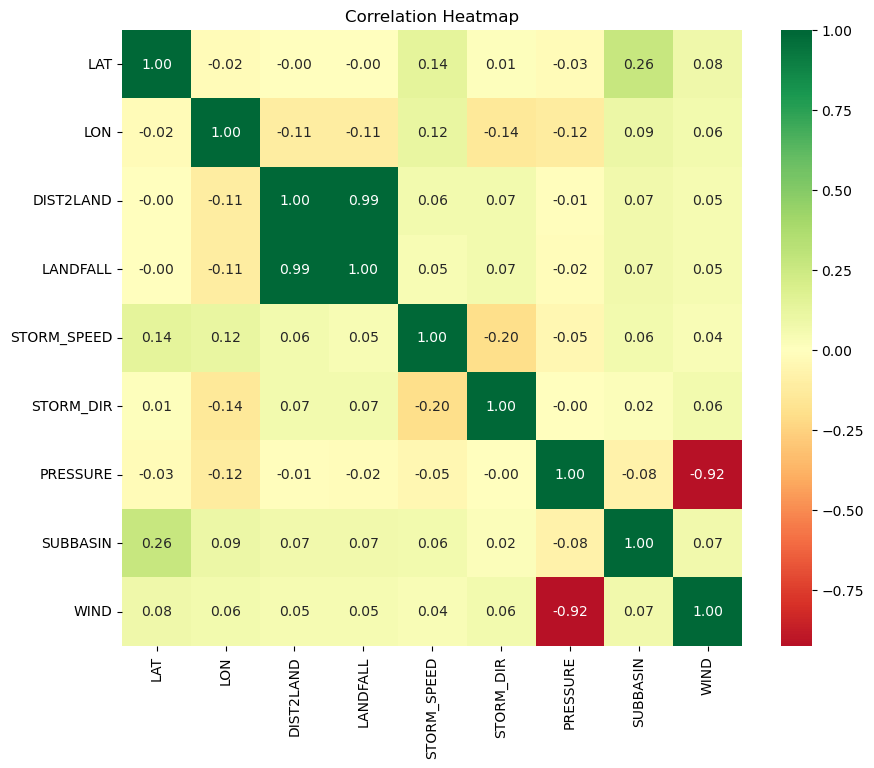

In [16]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', center=0)
plt.title('Correlation Heatmap')
# plt.savefig('CORRELATION_HEATMAP.jpg')
plt.show()

# Preprocess the data

In [17]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop('ISO_TIME', axis=1))
time_feature = data['ISO_TIME'].values  
data_scaled = data_scaled.astype('float32')

# Prepare the input

In [18]:
sequence_length = 10
X = []
y = []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, -1]) 

X = np.array(X)
y = np.array(y)

#  Split the data into training and testing sets

In [19]:
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model

In [20]:
# model = Sequential()
# model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# print(model.summary())

# Train the model

In [21]:
# model.fit(X_train, y_train, epochs=10, batch_size=16)

# Save the model

In [22]:
# model.save('main_code_copy.h5')
# print('Model Saved!')

 # load model

In [23]:
model=load_model('main_code_copy.h5')

# Evaluate the model

In [24]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

Train Loss: 0.00011590088251978159
Test Loss: 8.48039926495403e-05


#  Make predictions

In [25]:
predictions = model.predict(X_test)

2026/2026 [==============================] - 17s 7ms/step


In [26]:
mse = mean_squared_error(y_test,predictions)
mse

8.480401e-05

In [27]:
predictions

array([[0.4296152 ],
       [0.42965567],
       [0.42968625],
       ...,
       [0.4368021 ],
       [0.43101555],
       [0.43110693]], dtype=float32)

# Rescale the predictions

In [28]:
predictions_rescaled = np.zeros((predictions.shape[0], data_scaled.shape[1]-1))

In [29]:
# predictions_rescaled

In [30]:
# Rescale the predictions
min_val = scaler.data_min_[-1]
scale_val = scaler.data_range_[-1]
predictions_rescaled = predictions * scale_val + min_val

#  Rescale the predictions

In [31]:
for i in range(predictions_rescaled.shape[0]):
    print('Predicted wind speed:', predictions_rescaled[i])

Predicted wind speed: [35.039948]
Predicted wind speed: [35.052567]
Predicted wind speed: [35.062103]
Predicted wind speed: [37.84024]
Predicted wind speed: [41.180054]
Predicted wind speed: [40.526337]
Predicted wind speed: [40.665558]
Predicted wind speed: [36.673126]
Predicted wind speed: [34.697357]
Predicted wind speed: [35.195312]
Predicted wind speed: [35.086823]
Predicted wind speed: [31.355423]
Predicted wind speed: [29.62706]
Predicted wind speed: [30.156662]
Predicted wind speed: [30.07109]
Predicted wind speed: [26.52108]
Predicted wind speed: [24.991913]
Predicted wind speed: [21.727196]
Predicted wind speed: [19.992065]
Predicted wind speed: [20.388329]
Predicted wind speed: [23.563896]
Predicted wind speed: [24.248642]
Predicted wind speed: [26.302696]
Predicted wind speed: [26.009666]
Predicted wind speed: [25.991035]
Predicted wind speed: [26.21743]
Predicted wind speed: [26.408813]
Predicted wind speed: [26.449371]
Predicted wind speed: [26.423912]
Predicted wind spee

Predicted wind speed: [47.259583]
Predicted wind speed: [50.043854]
Predicted wind speed: [50.23912]
Predicted wind speed: [49.63286]
Predicted wind speed: [49.496918]
Predicted wind speed: [49.43686]
Predicted wind speed: [49.310654]
Predicted wind speed: [49.2623]
Predicted wind speed: [49.270782]
Predicted wind speed: [49.322968]
Predicted wind speed: [51.29416]
Predicted wind speed: [50.725357]
Predicted wind speed: [47.315903]
Predicted wind speed: [44.922195]
Predicted wind speed: [45.153168]
Predicted wind speed: [45.306595]
Predicted wind speed: [45.237793]
Predicted wind speed: [45.31714]
Predicted wind speed: [45.374466]
Predicted wind speed: [45.32515]
Predicted wind speed: [42.127716]
Predicted wind speed: [39.31273]
Predicted wind speed: [34.45366]
Predicted wind speed: [29.39833]
Predicted wind speed: [26.966652]
Predicted wind speed: [25.392372]
Predicted wind speed: [25.480331]
Predicted wind speed: [25.73719]
Predicted wind speed: [23.553886]
Predicted wind speed: [21.

Predicted wind speed: [28.876678]
Predicted wind speed: [28.735825]
Predicted wind speed: [28.9236]
Predicted wind speed: [28.735733]
Predicted wind speed: [28.884064]
Predicted wind speed: [28.904198]
Predicted wind speed: [28.937637]
Predicted wind speed: [28.942917]
Predicted wind speed: [28.966072]
Predicted wind speed: [28.995514]
Predicted wind speed: [29.02089]
Predicted wind speed: [29.035736]
Predicted wind speed: [24.595543]
Predicted wind speed: [24.777473]
Predicted wind speed: [28.005798]
Predicted wind speed: [30.788055]
Predicted wind speed: [30.836151]
Predicted wind speed: [30.835724]
Predicted wind speed: [30.688873]
Predicted wind speed: [30.22496]
Predicted wind speed: [30.033813]
Predicted wind speed: [29.81929]
Predicted wind speed: [29.845413]
Predicted wind speed: [29.848312]
Predicted wind speed: [30.021332]
Predicted wind speed: [31.302689]
Predicted wind speed: [33.465454]
Predicted wind speed: [36.842163]
Predicted wind speed: [36.185684]
Predicted wind spee

Predicted wind speed: [57.96849]
Predicted wind speed: [59.423645]
Predicted wind speed: [62.488266]
Predicted wind speed: [64.37491]
Predicted wind speed: [67.606476]
Predicted wind speed: [73.63928]
Predicted wind speed: [79.04756]
Predicted wind speed: [87.05249]
Predicted wind speed: [95.698135]
Predicted wind speed: [102.72333]
Predicted wind speed: [110.88014]
Predicted wind speed: [117.383194]
Predicted wind speed: [125.08211]
Predicted wind speed: [127.93193]
Predicted wind speed: [132.18803]
Predicted wind speed: [124.76883]
Predicted wind speed: [122.49661]
Predicted wind speed: [124.30145]
Predicted wind speed: [123.98976]
Predicted wind speed: [123.78754]
Predicted wind speed: [123.920746]
Predicted wind speed: [123.866974]
Predicted wind speed: [123.83522]
Predicted wind speed: [123.82416]
Predicted wind speed: [123.820816]
Predicted wind speed: [115.83266]
Predicted wind speed: [110.49458]
Predicted wind speed: [114.102234]
Predicted wind speed: [114.27348]
Predicted wind

Predicted wind speed: [38.42598]
Predicted wind speed: [46.39525]
Predicted wind speed: [52.82364]
Predicted wind speed: [58.154648]
Predicted wind speed: [65.78645]
Predicted wind speed: [74.82269]
Predicted wind speed: [86.20299]
Predicted wind speed: [97.06746]
Predicted wind speed: [94.6832]
Predicted wind speed: [91.297424]
Predicted wind speed: [91.34689]
Predicted wind speed: [90.9361]
Predicted wind speed: [90.47136]
Predicted wind speed: [90.60416]
Predicted wind speed: [93.902054]
Predicted wind speed: [97.4102]
Predicted wind speed: [106.17662]
Predicted wind speed: [115.89351]
Predicted wind speed: [115.86774]
Predicted wind speed: [116.63689]
Predicted wind speed: [116.34656]
Predicted wind speed: [115.3228]
Predicted wind speed: [114.77049]
Predicted wind speed: [114.42474]
Predicted wind speed: [108.131424]
Predicted wind speed: [101.565414]
Predicted wind speed: [103.87863]
Predicted wind speed: [105.73529]
Predicted wind speed: [106.051956]
Predicted wind speed: [105.9

Predicted wind speed: [86.54114]
Predicted wind speed: [85.977036]
Predicted wind speed: [85.70134]
Predicted wind speed: [85.19281]
Predicted wind speed: [84.091675]
Predicted wind speed: [83.04968]
Predicted wind speed: [69.553055]
Predicted wind speed: [62.26671]
Predicted wind speed: [59.752594]
Predicted wind speed: [54.989258]
Predicted wind speed: [51.33342]
Predicted wind speed: [49.972458]
Predicted wind speed: [44.662292]
Predicted wind speed: [40.553864]
Predicted wind speed: [42.12053]
Predicted wind speed: [41.88788]
Predicted wind speed: [39.309174]
Predicted wind speed: [39.18434]
Predicted wind speed: [35.980698]
Predicted wind speed: [33.88173]
Predicted wind speed: [31.191086]
Predicted wind speed: [29.350357]
Predicted wind speed: [29.570068]
Predicted wind speed: [29.64421]
Predicted wind speed: [29.627197]
Predicted wind speed: [29.631058]
Predicted wind speed: [28.989098]
Predicted wind speed: [28.95819]
Predicted wind speed: [29.122452]
Predicted wind speed: [29.

Predicted wind speed: [124.04999]
Predicted wind speed: [123.78012]
Predicted wind speed: [120.063614]
Predicted wind speed: [118.39331]
Predicted wind speed: [119.76196]
Predicted wind speed: [119.6525]
Predicted wind speed: [120.382645]
Predicted wind speed: [120.80823]
Predicted wind speed: [120.39316]
Predicted wind speed: [120.184845]
Predicted wind speed: [122.534485]
Predicted wind speed: [125.96463]
Predicted wind speed: [120.164444]
Predicted wind speed: [117.35791]
Predicted wind speed: [114.108185]
Predicted wind speed: [110.83386]
Predicted wind speed: [96.92331]
Predicted wind speed: [84.39908]
Predicted wind speed: [85.91489]
Predicted wind speed: [85.09538]
Predicted wind speed: [78.710144]
Predicted wind speed: [73.17149]
Predicted wind speed: [58.49005]
Predicted wind speed: [46.493362]
Predicted wind speed: [44.614075]
Predicted wind speed: [40.751434]
Predicted wind speed: [35.87982]
Predicted wind speed: [31.459381]
Predicted wind speed: [30.349396]
Predicted wind s

Predicted wind speed: [115.657104]
Predicted wind speed: [110.30643]
Predicted wind speed: [104.582016]
Predicted wind speed: [103.03143]
Predicted wind speed: [99.62372]
Predicted wind speed: [96.60799]
Predicted wind speed: [94.81117]
Predicted wind speed: [83.85951]
Predicted wind speed: [66.32544]
Predicted wind speed: [51.17975]
Predicted wind speed: [35.393295]
Predicted wind speed: [29.281693]
Predicted wind speed: [28.413788]
Predicted wind speed: [23.116623]
Predicted wind speed: [20.620453]
Predicted wind speed: [24.183945]
Predicted wind speed: [21.950508]
Predicted wind speed: [24.353195]
Predicted wind speed: [22.014885]
Predicted wind speed: [24.77221]
Predicted wind speed: [17.269135]
Predicted wind speed: [16.748444]
Predicted wind speed: [17.081772]
Predicted wind speed: [16.940979]
Predicted wind speed: [16.862068]
Predicted wind speed: [16.868973]
Predicted wind speed: [16.87033]
Predicted wind speed: [16.919495]
Predicted wind speed: [16.929222]
Predicted wind speed

Predicted wind speed: [64.83307]
Predicted wind speed: [62.30252]
Predicted wind speed: [55.707794]
Predicted wind speed: [55.802902]
Predicted wind speed: [51.38701]
Predicted wind speed: [45.464584]
Predicted wind speed: [43.679245]
Predicted wind speed: [42.13806]
Predicted wind speed: [39.322403]
Predicted wind speed: [37.50035]
Predicted wind speed: [34.856033]
Predicted wind speed: [33.194077]
Predicted wind speed: [25.01789]
Predicted wind speed: [23.857758]
Predicted wind speed: [22.626587]
Predicted wind speed: [22.4971]
Predicted wind speed: [33.652954]
Predicted wind speed: [31.432587]
Predicted wind speed: [31.828781]
Predicted wind speed: [33.638885]
Predicted wind speed: [36.470627]
Predicted wind speed: [36.188248]
Predicted wind speed: [36.104584]
Predicted wind speed: [36.016098]
Predicted wind speed: [35.91469]
Predicted wind speed: [32.187195]
Predicted wind speed: [30.332779]
Predicted wind speed: [30.701859]
Predicted wind speed: [30.53659]
Predicted wind speed: [3

Predicted wind speed: [85.30339]
Predicted wind speed: [84.57242]
Predicted wind speed: [85.26335]
Predicted wind speed: [85.39023]
Predicted wind speed: [86.350845]
Predicted wind speed: [86.08302]
Predicted wind speed: [85.72537]
Predicted wind speed: [85.67976]
Predicted wind speed: [96.130844]
Predicted wind speed: [105.91574]
Predicted wind speed: [101.51773]
Predicted wind speed: [100.06467]
Predicted wind speed: [111.435745]
Predicted wind speed: [120.35683]
Predicted wind speed: [117.890076]
Predicted wind speed: [120.397644]
Predicted wind speed: [120.42372]
Predicted wind speed: [119.55014]
Predicted wind speed: [119.097565]
Predicted wind speed: [118.8456]
Predicted wind speed: [118.64548]
Predicted wind speed: [114.615326]
Predicted wind speed: [112.71924]
Predicted wind speed: [109.773834]
Predicted wind speed: [107.52516]
Predicted wind speed: [107.375885]
Predicted wind speed: [106.96712]
Predicted wind speed: [101.08421]
Predicted wind speed: [95.4267]
Predicted wind sp

Predicted wind speed: [81.09845]
Predicted wind speed: [84.17604]
Predicted wind speed: [87.92267]
Predicted wind speed: [89.64816]
Predicted wind speed: [92.333496]
Predicted wind speed: [108.7679]
Predicted wind speed: [123.88649]
Predicted wind speed: [119.02315]
Predicted wind speed: [114.3887]
Predicted wind speed: [109.10379]
Predicted wind speed: [102.254196]
Predicted wind speed: [90.01895]
Predicted wind speed: [90.581696]
Predicted wind speed: [88.07388]
Predicted wind speed: [81.06596]
Predicted wind speed: [76.21179]
Predicted wind speed: [71.753296]
Predicted wind speed: [62.83989]
Predicted wind speed: [55.36969]
Predicted wind speed: [48.825012]
Predicted wind speed: [42.268585]
Predicted wind speed: [34.562515]
Predicted wind speed: [27.992073]
Predicted wind speed: [26.021645]
Predicted wind speed: [24.515427]
Predicted wind speed: [16.421616]
Predicted wind speed: [16.309265]
Predicted wind speed: [24.570885]
Predicted wind speed: [23.821808]
Predicted wind speed: [23

Predicted wind speed: [41.71817]
Predicted wind speed: [46.90561]
Predicted wind speed: [46.494934]
Predicted wind speed: [46.327377]
Predicted wind speed: [52.52208]
Predicted wind speed: [58.145187]
Predicted wind speed: [59.76982]
Predicted wind speed: [63.01178]
Predicted wind speed: [65.50003]
Predicted wind speed: [68.82495]
Predicted wind speed: [67.98584]
Predicted wind speed: [67.18584]
Predicted wind speed: [74.0703]
Predicted wind speed: [79.634766]
Predicted wind speed: [84.66341]
Predicted wind speed: [89.738434]
Predicted wind speed: [94.35443]
Predicted wind speed: [99.048294]
Predicted wind speed: [103.959625]
Predicted wind speed: [108.81441]
Predicted wind speed: [105.940765]
Predicted wind speed: [104.75192]
Predicted wind speed: [111.662]
Predicted wind speed: [117.10397]
Predicted wind speed: [124.93768]
Predicted wind speed: [133.17683]
Predicted wind speed: [129.09166]
Predicted wind speed: [127.738495]
Predicted wind speed: [122.33765]
Predicted wind speed: [115

Predicted wind speed: [33.16391]
Predicted wind speed: [36.269714]
Predicted wind speed: [37.95958]
Predicted wind speed: [41.093155]
Predicted wind speed: [42.875443]
Predicted wind speed: [45.966125]
Predicted wind speed: [45.264282]
Predicted wind speed: [45.023468]
Predicted wind speed: [44.891632]
Predicted wind speed: [44.72444]
Predicted wind speed: [47.19397]
Predicted wind speed: [50.49826]
Predicted wind speed: [50.01169]
Predicted wind speed: [49.913635]
Predicted wind speed: [52.525604]
Predicted wind speed: [55.778305]
Predicted wind speed: [54.972183]
Predicted wind speed: [54.846527]
Predicted wind speed: [54.82231]
Predicted wind speed: [54.734314]
Predicted wind speed: [54.841034]
Predicted wind speed: [54.823685]
Predicted wind speed: [55.04323]
Predicted wind speed: [55.232147]
Predicted wind speed: [58.148438]
Predicted wind speed: [61.596848]
Predicted wind speed: [61.046356]
Predicted wind speed: [61.000534]
Predicted wind speed: [61.30539]
Predicted wind speed: [

Predicted wind speed: [21.636726]
Predicted wind speed: [21.587852]
Predicted wind speed: [21.449623]
Predicted wind speed: [21.367683]
Predicted wind speed: [23.609695]
Predicted wind speed: [26.670853]
Predicted wind speed: [26.118553]
Predicted wind speed: [26.064117]
Predicted wind speed: [28.626442]
Predicted wind speed: [31.951706]
Predicted wind speed: [30.753845]
Predicted wind speed: [30.659042]
Predicted wind speed: [33.204926]
Predicted wind speed: [36.42424]
Predicted wind speed: [35.996902]
Predicted wind speed: [35.935165]
Predicted wind speed: [35.956985]
Predicted wind speed: [35.859253]
Predicted wind speed: [35.543655]
Predicted wind speed: [35.42238]
Predicted wind speed: [32.087112]
Predicted wind speed: [29.753326]
Predicted wind speed: [29.37416]
Predicted wind speed: [29.400925]
Predicted wind speed: [21.678307]
Predicted wind speed: [23.5262]
Predicted wind speed: [26.403229]
Predicted wind speed: [27.855537]
Predicted wind speed: [30.577011]
Predicted wind spee

Predicted wind speed: [16.823761]
Predicted wind speed: [16.735817]
Predicted wind speed: [18.667488]
Predicted wind speed: [21.297485]
Predicted wind speed: [21.077911]
Predicted wind speed: [21.047882]
Predicted wind speed: [21.12336]
Predicted wind speed: [24.456161]
Predicted wind speed: [24.045029]
Predicted wind speed: [23.837418]
Predicted wind speed: [23.806114]
Predicted wind speed: [23.610687]
Predicted wind speed: [23.986633]
Predicted wind speed: [26.228348]
Predicted wind speed: [25.988747]
Predicted wind speed: [25.925835]
Predicted wind speed: [28.060417]
Predicted wind speed: [31.043762]
Predicted wind speed: [30.95906]
Predicted wind speed: [30.9879]
Predicted wind speed: [30.876587]
Predicted wind speed: [30.719604]
Predicted wind speed: [33.011703]
Predicted wind speed: [36.233322]
Predicted wind speed: [37.956177]
Predicted wind speed: [40.863037]
Predicted wind speed: [40.920944]
Predicted wind speed: [40.850296]
Predicted wind speed: [46.62982]
Predicted wind spee

Predicted wind speed: [39.207886]
Predicted wind speed: [39.794815]
Predicted wind speed: [39.858612]
Predicted wind speed: [42.19551]
Predicted wind speed: [45.372574]
Predicted wind speed: [45.485046]
Predicted wind speed: [45.210434]
Predicted wind speed: [47.62825]
Predicted wind speed: [50.74092]
Predicted wind speed: [50.216293]
Predicted wind speed: [49.734924]
Predicted wind speed: [55.047577]
Predicted wind speed: [60.26297]
Predicted wind speed: [56.20703]
Predicted wind speed: [58.87326]
Predicted wind speed: [59.53383]
Predicted wind speed: [58.379852]
Predicted wind speed: [58.6588]
Predicted wind speed: [58.730453]
Predicted wind speed: [58.596725]
Predicted wind speed: [64.71875]
Predicted wind speed: [66.43739]
Predicted wind speed: [68.65117]
Predicted wind speed: [62.86258]
Predicted wind speed: [62.013947]
Predicted wind speed: [63.069794]
Predicted wind speed: [62.84915]
Predicted wind speed: [56.67978]
Predicted wind speed: [52.23227]
Predicted wind speed: [53.4434

Predicted wind speed: [11.009888]
Predicted wind speed: [11.680229]
Predicted wind speed: [11.507126]
Predicted wind speed: [11.507332]
Predicted wind speed: [11.578392]
Predicted wind speed: [13.509041]
Predicted wind speed: [16.495361]
Predicted wind speed: [16.718483]
Predicted wind speed: [21.294823]
Predicted wind speed: [21.566132]
Predicted wind speed: [21.28186]
Predicted wind speed: [21.263695]
Predicted wind speed: [21.206657]
Predicted wind speed: [26.36293]
Predicted wind speed: [31.398575]
Predicted wind speed: [31.514587]
Predicted wind speed: [31.195435]
Predicted wind speed: [31.238892]
Predicted wind speed: [31.263397]
Predicted wind speed: [31.182648]
Predicted wind speed: [31.096863]
Predicted wind speed: [30.878906]
Predicted wind speed: [30.663681]
Predicted wind speed: [32.470703]
Predicted wind speed: [35.289383]
Predicted wind speed: [35.648224]
Predicted wind speed: [35.73877]
Predicted wind speed: [37.91548]
Predicted wind speed: [41.133636]
Predicted wind spe

Predicted wind speed: [48.0905]
Predicted wind speed: [45.619904]
Predicted wind speed: [44.013626]
Predicted wind speed: [44.36914]
Predicted wind speed: [44.54387]
Predicted wind speed: [41.409485]
Predicted wind speed: [39.623535]
Predicted wind speed: [39.801926]
Predicted wind speed: [39.711502]
Predicted wind speed: [36.491486]
Predicted wind speed: [34.593582]
Predicted wind speed: [34.550568]
Predicted wind speed: [34.339035]
Predicted wind speed: [31.13031]
Predicted wind speed: [29.174133]
Predicted wind speed: [28.91478]
Predicted wind speed: [28.551888]
Predicted wind speed: [25.498894]
Predicted wind speed: [23.747719]
Predicted wind speed: [23.730896]
Predicted wind speed: [23.646225]
Predicted wind speed: [23.543304]
Predicted wind speed: [23.151497]
Predicted wind speed: [27.460655]
Predicted wind speed: [26.600395]
Predicted wind speed: [26.474174]
Predicted wind speed: [26.295555]
Predicted wind speed: [26.139381]
Predicted wind speed: [28.354057]
Predicted wind speed

Predicted wind speed: [133.19405]
Predicted wind speed: [133.58945]
Predicted wind speed: [128.35101]
Predicted wind speed: [126.81792]
Predicted wind speed: [123.28174]
Predicted wind speed: [121.00383]
Predicted wind speed: [114.43919]
Predicted wind speed: [109.074036]
Predicted wind speed: [104.12224]
Predicted wind speed: [98.822525]
Predicted wind speed: [93.47763]
Predicted wind speed: [87.98616]
Predicted wind speed: [85.23416]
Predicted wind speed: [83.13931]
Predicted wind speed: [83.62843]
Predicted wind speed: [78.767624]
Predicted wind speed: [71.58675]
Predicted wind speed: [67.710754]
Predicted wind speed: [58.240097]
Predicted wind speed: [50.15039]
Predicted wind speed: [44.170883]
Predicted wind speed: [42.7706]
Predicted wind speed: [41.431793]
Predicted wind speed: [38.80356]
Predicted wind speed: [37.358887]
Predicted wind speed: [34.600906]
Predicted wind speed: [33.195587]
Predicted wind speed: [30.466354]
Predicted wind speed: [28.821518]
Predicted wind speed: [

Predicted wind speed: [55.076126]
Predicted wind speed: [55.006577]
Predicted wind speed: [55.00917]
Predicted wind speed: [55.463272]
Predicted wind speed: [55.329163]
Predicted wind speed: [55.324493]
Predicted wind speed: [55.251312]
Predicted wind speed: [55.207596]
Predicted wind speed: [55.226593]
Predicted wind speed: [55.08441]
Predicted wind speed: [54.73433]
Predicted wind speed: [54.698837]
Predicted wind speed: [54.840973]
Predicted wind speed: [54.60472]
Predicted wind speed: [54.44333]
Predicted wind speed: [54.56749]
Predicted wind speed: [54.516083]
Predicted wind speed: [54.08841]
Predicted wind speed: [53.592392]
Predicted wind speed: [53.634262]
Predicted wind speed: [53.14073]
Predicted wind speed: [53.208298]
Predicted wind speed: [53.013123]
Predicted wind speed: [52.8954]
Predicted wind speed: [51.814713]
Predicted wind speed: [54.650238]
Predicted wind speed: [53.503906]
Predicted wind speed: [55.144638]
Predicted wind speed: [57.545166]
Predicted wind speed: [5

Predicted wind speed: [36.68033]
Predicted wind speed: [38.62509]
Predicted wind speed: [41.948044]
Predicted wind speed: [41.268036]
Predicted wind speed: [41.12532]
Predicted wind speed: [40.97467]
Predicted wind speed: [40.838043]
Predicted wind speed: [40.780457]
Predicted wind speed: [40.728058]
Predicted wind speed: [40.72078]
Predicted wind speed: [40.72293]
Predicted wind speed: [43.336487]
Predicted wind speed: [46.501205]
Predicted wind speed: [48.538055]
Predicted wind speed: [51.863937]
Predicted wind speed: [53.634827]
Predicted wind speed: [56.944504]
Predicted wind speed: [55.88643]
Predicted wind speed: [55.68605]
Predicted wind speed: [51.445236]
Predicted wind speed: [49.489822]
Predicted wind speed: [46.137543]
Predicted wind speed: [44.23311]
Predicted wind speed: [41.077103]
Predicted wind speed: [39.224518]
Predicted wind speed: [36.09059]
Predicted wind speed: [34.284042]
Predicted wind speed: [31.22557]
Predicted wind speed: [29.528412]
Predicted wind speed: [30

Predicted wind speed: [29.723831]
Predicted wind speed: [29.576233]
Predicted wind speed: [29.238693]
Predicted wind speed: [26.56108]
Predicted wind speed: [23.793953]
Predicted wind speed: [23.393044]
Predicted wind speed: [23.494026]
Predicted wind speed: [23.714455]
Predicted wind speed: [23.915703]
Predicted wind speed: [23.974434]
Predicted wind speed: [23.943321]
Predicted wind speed: [23.898972]
Predicted wind speed: [23.846077]
Predicted wind speed: [23.696243]
Predicted wind speed: [23.577133]
Predicted wind speed: [23.574081]
Predicted wind speed: [24.502335]
Predicted wind speed: [14.919167]
Predicted wind speed: [16.792686]
Predicted wind speed: [18.988708]
Predicted wind speed: [21.804298]
Predicted wind speed: [21.777145]
Predicted wind speed: [21.80716]
Predicted wind speed: [21.754158]
Predicted wind speed: [21.64846]
Predicted wind speed: [23.815208]
Predicted wind speed: [26.845589]
Predicted wind speed: [28.932632]
Predicted wind speed: [31.120255]
Predicted wind sp

Predicted wind speed: [49.252914]
Predicted wind speed: [52.228973]
Predicted wind speed: [54.593506]
Predicted wind speed: [57.60521]
Predicted wind speed: [56.727356]
Predicted wind speed: [56.195694]
Predicted wind speed: [59.240982]
Predicted wind speed: [62.779953]
Predicted wind speed: [61.75049]
Predicted wind speed: [61.25522]
Predicted wind speed: [61.208344]
Predicted wind speed: [61.039474]
Predicted wind speed: [63.4917]
Predicted wind speed: [67.05145]
Predicted wind speed: [66.32602]
Predicted wind speed: [65.8121]
Predicted wind speed: [66.47241]
Predicted wind speed: [66.47745]
Predicted wind speed: [69.22226]
Predicted wind speed: [72.73357]
Predicted wind speed: [78.63835]
Predicted wind speed: [83.88507]
Predicted wind speed: [88.984634]
Predicted wind speed: [93.80153]
Predicted wind speed: [101.92061]
Predicted wind speed: [110.79266]
Predicted wind speed: [114.47638]
Predicted wind speed: [117.84999]
Predicted wind speed: [119.212326]
Predicted wind speed: [121.91

Predicted wind speed: [57.10315]
Predicted wind speed: [59.321396]
Predicted wind speed: [62.390076]
Predicted wind speed: [64.4572]
Predicted wind speed: [67.50427]
Predicted wind speed: [73.46222]
Predicted wind speed: [78.7337]
Predicted wind speed: [83.80704]
Predicted wind speed: [88.66844]
Predicted wind speed: [93.90584]
Predicted wind speed: [99.03949]
Predicted wind speed: [117.32991]
Predicted wind speed: [133.84846]
Predicted wind speed: [133.75421]
Predicted wind speed: [136.14297]
Predicted wind speed: [137.87712]
Predicted wind speed: [140.34068]
Predicted wind speed: [138.478]
Predicted wind speed: [137.6697]
Predicted wind speed: [137.01819]
Predicted wind speed: [136.53366]
Predicted wind speed: [124.896454]
Predicted wind speed: [116.90759]
Predicted wind speed: [116.8992]
Predicted wind speed: [115.9639]
Predicted wind speed: [109.46089]
Predicted wind speed: [104.139435]
Predicted wind speed: [101.15671]
Predicted wind speed: [95.698685]
Predicted wind speed: [87.15

Predicted wind speed: [40.772263]
Predicted wind speed: [38.333817]
Predicted wind speed: [35.49785]
Predicted wind speed: [33.814224]
Predicted wind speed: [35.037262]
Predicted wind speed: [34.893494]
Predicted wind speed: [31.615036]
Predicted wind speed: [29.296295]
Predicted wind speed: [29.465576]
Predicted wind speed: [26.698975]
Predicted wind speed: [34.756622]
Predicted wind speed: [33.949158]
Predicted wind speed: [32.36412]
Predicted wind speed: [32.10907]
Predicted wind speed: [31.684937]
Predicted wind speed: [31.248703]
Predicted wind speed: [30.967224]
Predicted wind speed: [30.849655]
Predicted wind speed: [28.045609]
Predicted wind speed: [25.069405]
Predicted wind speed: [25.538094]
Predicted wind speed: [25.92176]
Predicted wind speed: [26.183548]
Predicted wind speed: [26.218178]
Predicted wind speed: [25.94027]
Predicted wind speed: [25.651611]
Predicted wind speed: [28.614655]
Predicted wind speed: [31.782166]
Predicted wind speed: [32.133087]
Predicted wind spee

Predicted wind speed: [74.63678]
Predicted wind speed: [63.931458]
Predicted wind speed: [51.636963]
Predicted wind speed: [46.067627]
Predicted wind speed: [40.71901]
Predicted wind speed: [42.107483]
Predicted wind speed: [42.947845]
Predicted wind speed: [29.008972]
Predicted wind speed: [22.297707]
Predicted wind speed: [17.555748]
Predicted wind speed: [15.938057]
Predicted wind speed: [30.076874]
Predicted wind speed: [30.763123]
Predicted wind speed: [30.065704]
Predicted wind speed: [30.363388]
Predicted wind speed: [30.259491]
Predicted wind speed: [30.060638]
Predicted wind speed: [29.86531]
Predicted wind speed: [29.990204]
Predicted wind speed: [30.017975]
Predicted wind speed: [32.437515]
Predicted wind speed: [36.883224]
Predicted wind speed: [38.639862]
Predicted wind speed: [41.62326]
Predicted wind speed: [41.23889]
Predicted wind speed: [40.917847]
Predicted wind speed: [43.50824]
Predicted wind speed: [46.974533]
Predicted wind speed: [52.25676]
Predicted wind speed:

Predicted wind speed: [46.029404]
Predicted wind speed: [45.8461]
Predicted wind speed: [46.352234]
Predicted wind speed: [46.34343]
Predicted wind speed: [48.862885]
Predicted wind speed: [51.564682]
Predicted wind speed: [51.24727]
Predicted wind speed: [50.275864]
Predicted wind speed: [50.11107]
Predicted wind speed: [50.01445]
Predicted wind speed: [49.810867]
Predicted wind speed: [49.587067]
Predicted wind speed: [49.38629]
Predicted wind speed: [49.27356]
Predicted wind speed: [45.23291]
Predicted wind speed: [43.997955]
Predicted wind speed: [44.142944]
Predicted wind speed: [44.016098]
Predicted wind speed: [43.912292]
Predicted wind speed: [44.120773]
Predicted wind speed: [35.39209]
Predicted wind speed: [34.298584]
Predicted wind speed: [25.985664]
Predicted wind speed: [25.516655]
Predicted wind speed: [25.8945]
Predicted wind speed: [25.74134]
Predicted wind speed: [27.929031]
Predicted wind speed: [30.00122]
Predicted wind speed: [29.856445]
Predicted wind speed: [29.92

Predicted wind speed: [32.854904]
Predicted wind speed: [35.109436]
Predicted wind speed: [40.261993]
Predicted wind speed: [45.39215]
Predicted wind speed: [50.677322]
Predicted wind speed: [51.569244]
Predicted wind speed: [48.65677]
Predicted wind speed: [49.843643]
Predicted wind speed: [51.471756]
Predicted wind speed: [50.44745]
Predicted wind speed: [48.114]
Predicted wind speed: [49.44922]
Predicted wind speed: [46.486206]
Predicted wind speed: [44.76097]
Predicted wind speed: [45.783417]
Predicted wind speed: [44.56755]
Predicted wind speed: [43.10501]
Predicted wind speed: [40.026337]
Predicted wind speed: [40.620056]
Predicted wind speed: [40.225204]
Predicted wind speed: [38.147064]
Predicted wind speed: [40.056427]
Predicted wind speed: [36.462692]
Predicted wind speed: [39.815613]
Predicted wind speed: [36.782486]
Predicted wind speed: [40.031006]
Predicted wind speed: [36.801956]
Predicted wind speed: [35.55684]
Predicted wind speed: [36.063675]
Predicted wind speed: [35

Predicted wind speed: [43.460648]
Predicted wind speed: [46.55168]
Predicted wind speed: [48.418747]
Predicted wind speed: [51.3667]
Predicted wind speed: [51.016235]
Predicted wind speed: [50.626816]
Predicted wind speed: [53.288513]
Predicted wind speed: [56.579926]
Predicted wind speed: [56.204514]
Predicted wind speed: [55.57596]
Predicted wind speed: [56.46176]
Predicted wind speed: [56.219467]
Predicted wind speed: [57.287415]
Predicted wind speed: [59.552948]
Predicted wind speed: [63.093216]
Predicted wind speed: [66.243546]
Predicted wind speed: [66.75304]
Predicted wind speed: [71.95807]
Predicted wind speed: [73.1414]
Predicted wind speed: [75.18663]
Predicted wind speed: [75.17172]
Predicted wind speed: [74.63437]
Predicted wind speed: [69.921936]
Predicted wind speed: [67.24452]
Predicted wind speed: [52.010498]
Predicted wind speed: [43.42354]
Predicted wind speed: [41.323883]
Predicted wind speed: [42.5455]
Predicted wind speed: [33.781326]
Predicted wind speed: [32.0466

Predicted wind speed: [123.67244]
Predicted wind speed: [113.2417]
Predicted wind speed: [107.374374]
Predicted wind speed: [110.5804]
Predicted wind speed: [110.74051]
Predicted wind speed: [102.89102]
Predicted wind speed: [97.47449]
Predicted wind speed: [100.34122]
Predicted wind speed: [100.8414]
Predicted wind speed: [88.076706]
Predicted wind speed: [80.156555]
Predicted wind speed: [83.917435]
Predicted wind speed: [84.52995]
Predicted wind speed: [72.45668]
Predicted wind speed: [68.256714]
Predicted wind speed: [67.463776]
Predicted wind speed: [66.9391]
Predicted wind speed: [66.2395]
Predicted wind speed: [65.83597]
Predicted wind speed: [55.69171]
Predicted wind speed: [43.473404]
Predicted wind speed: [47.23369]
Predicted wind speed: [46.97374]
Predicted wind speed: [31.015503]
Predicted wind speed: [32.716064]
Predicted wind speed: [35.97313]
Predicted wind speed: [37.434677]
Predicted wind speed: [40.261887]
Predicted wind speed: [42.60898]
Predicted wind speed: [45.972

Predicted wind speed: [63.321106]
Predicted wind speed: [66.64601]
Predicted wind speed: [68.50363]
Predicted wind speed: [71.26947]
Predicted wind speed: [76.98833]
Predicted wind speed: [82.77579]
Predicted wind speed: [76.25874]
Predicted wind speed: [68.46251]
Predicted wind speed: [62.86206]
Predicted wind speed: [57.596985]
Predicted wind speed: [49.72293]
Predicted wind speed: [46.21556]
Predicted wind speed: [48.053818]
Predicted wind speed: [47.512238]
Predicted wind speed: [44.780396]
Predicted wind speed: [42.88298]
Predicted wind speed: [43.290115]
Predicted wind speed: [43.34256]
Predicted wind speed: [46.524124]
Predicted wind speed: [45.710526]
Predicted wind speed: [45.173706]
Predicted wind speed: [45.19696]
Predicted wind speed: [45.011887]
Predicted wind speed: [44.766174]
Predicted wind speed: [44.86592]
Predicted wind speed: [44.8004]
Predicted wind speed: [44.635254]
Predicted wind speed: [44.063187]
Predicted wind speed: [43.810013]
Predicted wind speed: [43.5971

Predicted wind speed: [26.37883]
Predicted wind speed: [26.42891]
Predicted wind speed: [28.168663]
Predicted wind speed: [30.918427]
Predicted wind speed: [32.963745]
Predicted wind speed: [35.598907]
Predicted wind speed: [36.01416]
Predicted wind speed: [35.849945]
Predicted wind speed: [33.498566]
Predicted wind speed: [31.239761]
Predicted wind speed: [31.025375]
Predicted wind speed: [31.027145]
Predicted wind speed: [30.992218]
Predicted wind speed: [31.018417]
Predicted wind speed: [31.065872]
Predicted wind speed: [31.09613]
Predicted wind speed: [31.225922]
Predicted wind speed: [31.246338]
Predicted wind speed: [31.265732]
Predicted wind speed: [31.283081]
Predicted wind speed: [31.286377]
Predicted wind speed: [31.28984]
Predicted wind speed: [31.28859]
Predicted wind speed: [31.284485]
Predicted wind speed: [31.287766]
Predicted wind speed: [31.30545]
Predicted wind speed: [31.3107]
Predicted wind speed: [31.310425]
Predicted wind speed: [33.161316]
Predicted wind speed: [

Predicted wind speed: [78.59529]
Predicted wind speed: [78.505005]
Predicted wind speed: [78.31123]
Predicted wind speed: [78.36461]
Predicted wind speed: [78.26196]
Predicted wind speed: [87.85066]
Predicted wind speed: [96.59061]
Predicted wind speed: [102.99568]
Predicted wind speed: [111.16783]
Predicted wind speed: [99.81845]
Predicted wind speed: [93.921234]
Predicted wind speed: [90.90927]
Predicted wind speed: [85.68526]
Predicted wind speed: [80.58084]
Predicted wind speed: [75.778946]
Predicted wind speed: [70.9991]
Predicted wind speed: [66.2639]
Predicted wind speed: [57.040054]
Predicted wind speed: [50.42502]
Predicted wind speed: [46.663498]
Predicted wind speed: [41.912476]
Predicted wind speed: [40.013504]
Predicted wind speed: [38.479843]
Predicted wind speed: [35.62039]
Predicted wind speed: [34.079468]
Predicted wind speed: [31.07521]
Predicted wind speed: [29.5029]
Predicted wind speed: [30.174591]
Predicted wind speed: [29.39067]
Predicted wind speed: [25.909805]


Predicted wind speed: [33.879288]
Predicted wind speed: [33.88289]
Predicted wind speed: [33.860977]
Predicted wind speed: [33.84265]
Predicted wind speed: [33.83217]
Predicted wind speed: [33.75905]
Predicted wind speed: [33.69348]
Predicted wind speed: [30.618546]
Predicted wind speed: [28.467163]
Predicted wind speed: [28.681335]
Predicted wind speed: [28.762978]
Predicted wind speed: [20.605316]
Predicted wind speed: [23.380478]
Predicted wind speed: [23.588867]
Predicted wind speed: [23.183052]
Predicted wind speed: [22.931015]
Predicted wind speed: [22.658333]
Predicted wind speed: [22.403442]
Predicted wind speed: [22.194588]
Predicted wind speed: [22.029915]
Predicted wind speed: [21.557892]
Predicted wind speed: [21.187927]
Predicted wind speed: [21.187744]
Predicted wind speed: [21.14949]
Predicted wind speed: [21.140457]
Predicted wind speed: [21.133804]
Predicted wind speed: [23.478271]
Predicted wind speed: [26.29152]
Predicted wind speed: [25.725494]
Predicted wind speed:

Predicted wind speed: [92.7538]
Predicted wind speed: [95.13309]
Predicted wind speed: [98.221756]
Predicted wind speed: [104.30655]
Predicted wind speed: [109.339935]
Predicted wind speed: [121.339355]
Predicted wind speed: [132.22392]
Predicted wind speed: [130.79475]
Predicted wind speed: [131.98985]
Predicted wind speed: [134.8669]
Predicted wind speed: [137.21788]
Predicted wind speed: [145.96584]
Predicted wind speed: [154.39757]
Predicted wind speed: [145.61694]
Predicted wind speed: [143.21031]
Predicted wind speed: [141.09628]
Predicted wind speed: [138.45816]
Predicted wind speed: [135.51067]
Predicted wind speed: [133.96962]
Predicted wind speed: [130.28134]
Predicted wind speed: [127.94289]
Predicted wind speed: [122.85162]
Predicted wind speed: [117.416214]
Predicted wind speed: [116.064926]
Predicted wind speed: [114.84648]
Predicted wind speed: [115.49982]
Predicted wind speed: [115.805466]
Predicted wind speed: [111.16211]
Predicted wind speed: [109.07124]
Predicted win

Predicted wind speed: [35.68065]
Predicted wind speed: [35.760193]
Predicted wind speed: [35.53778]
Predicted wind speed: [35.396057]
Predicted wind speed: [35.375244]
Predicted wind speed: [35.30246]
Predicted wind speed: [37.822647]
Predicted wind speed: [40.85919]
Predicted wind speed: [40.237106]
Predicted wind speed: [40.31888]
Predicted wind speed: [42.83435]
Predicted wind speed: [45.836334]
Predicted wind speed: [44.98018]
Predicted wind speed: [45.046295]
Predicted wind speed: [44.965073]
Predicted wind speed: [44.744812]
Predicted wind speed: [40.857925]
Predicted wind speed: [39.200317]
Predicted wind speed: [35.874695]
Predicted wind speed: [34.175034]
Predicted wind speed: [34.73784]
Predicted wind speed: [34.699417]
Predicted wind speed: [34.86943]
Predicted wind speed: [34.940002]
Predicted wind speed: [35.00177]
Predicted wind speed: [35.046936]
Predicted wind speed: [35.01216]
Predicted wind speed: [34.907425]
Predicted wind speed: [34.871124]
Predicted wind speed: [34

Predicted wind speed: [79.087204]
Predicted wind speed: [79.37839]
Predicted wind speed: [80.06831]
Predicted wind speed: [80.492065]
Predicted wind speed: [80.430405]
Predicted wind speed: [83.76248]
Predicted wind speed: [87.46188]
Predicted wind speed: [89.10452]
Predicted wind speed: [92.0063]
Predicted wind speed: [86.43028]
Predicted wind speed: [83.479324]
Predicted wind speed: [80.4265]
Predicted wind speed: [78.451385]
Predicted wind speed: [75.29761]
Predicted wind speed: [73.508316]
Predicted wind speed: [71.82623]
Predicted wind speed: [72.35533]
Predicted wind speed: [68.778946]
Predicted wind speed: [69.870804]
Predicted wind speed: [70.22015]
Predicted wind speed: [70.23581]
Predicted wind speed: [73.56271]
Predicted wind speed: [77.04071]
Predicted wind speed: [79.18651]
Predicted wind speed: [82.74025]
Predicted wind speed: [88.97095]
Predicted wind speed: [93.34358]
Predicted wind speed: [93.85179]
Predicted wind speed: [96.99686]
Predicted wind speed: [91.26367]
Pred

Predicted wind speed: [51.266846]
Predicted wind speed: [49.32541]
Predicted wind speed: [46.334244]
Predicted wind speed: [44.558624]
Predicted wind speed: [41.635986]
Predicted wind speed: [39.841064]
Predicted wind speed: [40.134216]
Predicted wind speed: [40.250977]
Predicted wind speed: [40.344284]
Predicted wind speed: [40.42607]
Predicted wind speed: [37.32074]
Predicted wind speed: [35.532364]
Predicted wind speed: [32.476166]
Predicted wind speed: [30.537003]
Predicted wind speed: [30.661514]
Predicted wind speed: [30.647919]
Predicted wind speed: [27.591019]
Predicted wind speed: [25.890617]
Predicted wind speed: [26.111153]
Predicted wind speed: [26.137413]
Predicted wind speed: [26.194908]
Predicted wind speed: [26.196434]
Predicted wind speed: [26.11599]
Predicted wind speed: [25.964706]
Predicted wind speed: [25.822845]
Predicted wind speed: [25.716179]
Predicted wind speed: [22.185066]
Predicted wind speed: [25.57711]
Predicted wind speed: [25.971436]
Predicted wind spee

Predicted wind speed: [137.99823]
Predicted wind speed: [142.05219]
Predicted wind speed: [146.29568]
Predicted wind speed: [145.08748]
Predicted wind speed: [143.45561]
Predicted wind speed: [146.14381]
Predicted wind speed: [149.91846]
Predicted wind speed: [150.69035]
Predicted wind speed: [152.80707]
Predicted wind speed: [141.98654]
Predicted wind speed: [132.55424]
Predicted wind speed: [127.50908]
Predicted wind speed: [121.39838]
Predicted wind speed: [119.62935]
Predicted wind speed: [119.39267]
Predicted wind speed: [120.19681]
Predicted wind speed: [120.39787]
Predicted wind speed: [116.33458]
Predicted wind speed: [113.65416]
Predicted wind speed: [108.48341]
Predicted wind speed: [102.30527]
Predicted wind speed: [97.48677]
Predicted wind speed: [92.442276]
Predicted wind speed: [90.20543]
Predicted wind speed: [89.11081]
Predicted wind speed: [89.87224]
Predicted wind speed: [90.742065]
Predicted wind speed: [86.35071]
Predicted wind speed: [83.370926]
Predicted wind spee

Predicted wind speed: [26.073288]
Predicted wind speed: [26.100609]
Predicted wind speed: [26.183159]
Predicted wind speed: [26.215202]
Predicted wind speed: [26.274338]
Predicted wind speed: [26.254532]
Predicted wind speed: [26.170753]
Predicted wind speed: [25.951385]
Predicted wind speed: [25.661667]
Predicted wind speed: [25.266098]
Predicted wind speed: [24.904213]
Predicted wind speed: [24.560822]
Predicted wind speed: [39.49086]
Predicted wind speed: [32.77533]
Predicted wind speed: [35.842392]
Predicted wind speed: [37.90941]
Predicted wind speed: [40.856064]
Predicted wind speed: [40.49695]
Predicted wind speed: [40.51204]
Predicted wind speed: [40.38118]
Predicted wind speed: [40.245148]
Predicted wind speed: [40.1214]
Predicted wind speed: [40.080994]
Predicted wind speed: [40.15918]
Predicted wind speed: [40.159225]
Predicted wind speed: [42.648605]
Predicted wind speed: [45.6754]
Predicted wind speed: [44.96762]
Predicted wind speed: [45.132645]
Predicted wind speed: [45.

Predicted wind speed: [46.33992]
Predicted wind speed: [51.75905]
Predicted wind speed: [56.80432]
Predicted wind speed: [62.385773]
Predicted wind speed: [67.63873]
Predicted wind speed: [76.17604]
Predicted wind speed: [85.28432]
Predicted wind speed: [92.429276]
Predicted wind speed: [100.02313]
Predicted wind speed: [95.47235]
Predicted wind speed: [93.93492]
Predicted wind speed: [89.97211]
Predicted wind speed: [87.58032]
Predicted wind speed: [84.152115]
Predicted wind speed: [82.134674]
Predicted wind speed: [78.95958]
Predicted wind speed: [77.195496]
Predicted wind speed: [74.14813]
Predicted wind speed: [72.197815]
Predicted wind speed: [69.00455]
Predicted wind speed: [67.875824]
Predicted wind speed: [68.8109]
Predicted wind speed: [69.23389]
Predicted wind speed: [65.206314]
Predicted wind speed: [63.403778]
Predicted wind speed: [60.056046]
Predicted wind speed: [58.229538]
Predicted wind speed: [59.10721]
Predicted wind speed: [59.232346]
Predicted wind speed: [66.47841

Predicted wind speed: [35.87628]
Predicted wind speed: [35.78279]
Predicted wind speed: [35.73828]
Predicted wind speed: [35.73375]
Predicted wind speed: [38.14525]
Predicted wind speed: [41.493774]
Predicted wind speed: [40.485474]
Predicted wind speed: [40.524673]
Predicted wind speed: [36.53195]
Predicted wind speed: [34.535873]
Predicted wind speed: [31.537613]
Predicted wind speed: [29.657959]
Predicted wind speed: [26.921074]
Predicted wind speed: [25.084373]
Predicted wind speed: [25.40532]
Predicted wind speed: [25.41986]
Predicted wind speed: [25.5139]
Predicted wind speed: [25.570862]
Predicted wind speed: [25.658752]
Predicted wind speed: [25.782883]
Predicted wind speed: [25.841385]
Predicted wind speed: [25.858513]
Predicted wind speed: [25.839584]
Predicted wind speed: [25.805756]
Predicted wind speed: [25.80449]
Predicted wind speed: [27.346115]
Predicted wind speed: [18.227623]
Predicted wind speed: [21.3219]
Predicted wind speed: [16.445488]
Predicted wind speed: [20.7

Predicted wind speed: [20.166512]
Predicted wind speed: [20.041504]
Predicted wind speed: [20.190254]
Predicted wind speed: [25.763397]
Predicted wind speed: [25.854446]
Predicted wind speed: [25.783684]
Predicted wind speed: [25.990753]
Predicted wind speed: [26.206627]
Predicted wind speed: [28.20015]
Predicted wind speed: [30.927277]
Predicted wind speed: [32.959183]
Predicted wind speed: [36.129272]
Predicted wind speed: [36.095047]
Predicted wind speed: [35.83722]
Predicted wind speed: [35.496048]
Predicted wind speed: [35.170563]
Predicted wind speed: [34.768463]
Predicted wind speed: [37.536484]
Predicted wind speed: [31.732819]
Predicted wind speed: [27.367226]
Predicted wind speed: [26.70768]
Predicted wind speed: [25.033195]
Predicted wind speed: [34.078354]
Predicted wind speed: [31.38443]
Predicted wind speed: [31.393417]
Predicted wind speed: [31.146194]
Predicted wind speed: [30.942322]
Predicted wind speed: [30.805695]
Predicted wind speed: [30.677933]
Predicted wind spe

Predicted wind speed: [85.036255]
Predicted wind speed: [82.33038]
Predicted wind speed: [79.54176]
Predicted wind speed: [83.13377]
Predicted wind speed: [86.590836]
Predicted wind speed: [93.5226]
Predicted wind speed: [98.75638]
Predicted wind speed: [110.14566]
Predicted wind speed: [120.45021]
Predicted wind speed: [126.083954]
Predicted wind speed: [133.62167]
Predicted wind speed: [130.22987]
Predicted wind speed: [128.53499]
Predicted wind speed: [128.75383]
Predicted wind speed: [128.21353]
Predicted wind speed: [130.90787]
Predicted wind speed: [134.49649]
Predicted wind speed: [129.66106]
Predicted wind speed: [126.08359]
Predicted wind speed: [123.4539]
Predicted wind speed: [121.251144]
Predicted wind speed: [111.66301]
Predicted wind speed: [103.469086]
Predicted wind speed: [92.80586]
Predicted wind speed: [82.652084]
Predicted wind speed: [77.94258]
Predicted wind speed: [73.78444]
Predicted wind speed: [62.86606]
Predicted wind speed: [53.1812]
Predicted wind speed: [4

Predicted wind speed: [22.013214]
Predicted wind speed: [22.115181]
Predicted wind speed: [22.072998]
Predicted wind speed: [22.111198]
Predicted wind speed: [22.103943]
Predicted wind speed: [22.063759]
Predicted wind speed: [22.06614]
Predicted wind speed: [22.075676]
Predicted wind speed: [22.112404]
Predicted wind speed: [22.126656]
Predicted wind speed: [22.151443]
Predicted wind speed: [22.446518]
Predicted wind speed: [23.109894]
Predicted wind speed: [20.977303]
Predicted wind speed: [21.957275]
Predicted wind speed: [21.719643]
Predicted wind speed: [21.691544]
Predicted wind speed: [21.665565]
Predicted wind speed: [21.584953]
Predicted wind speed: [21.533195]
Predicted wind speed: [21.528976]
Predicted wind speed: [21.52929]
Predicted wind speed: [21.59378]
Predicted wind speed: [26.87114]
Predicted wind speed: [26.762054]
Predicted wind speed: [26.452827]
Predicted wind speed: [28.809189]
Predicted wind speed: [31.954529]
Predicted wind speed: [32.85608]
Predicted wind spee

Predicted wind speed: [30.66594]
Predicted wind speed: [30.565384]
Predicted wind speed: [30.459976]
Predicted wind speed: [30.21669]
Predicted wind speed: [29.740738]
Predicted wind speed: [32.541687]
Predicted wind speed: [35.555588]
Predicted wind speed: [35.04654]
Predicted wind speed: [34.905075]
Predicted wind speed: [34.889267]
Predicted wind speed: [34.924545]
Predicted wind speed: [28.464691]
Predicted wind speed: [29.336655]
Predicted wind speed: [30.051575]
Predicted wind speed: [32.334503]
Predicted wind speed: [35.634964]
Predicted wind speed: [35.44432]
Predicted wind speed: [35.331833]
Predicted wind speed: [37.81299]
Predicted wind speed: [41.16484]
Predicted wind speed: [43.17206]
Predicted wind speed: [46.41237]
Predicted wind speed: [48.40721]
Predicted wind speed: [51.577682]
Predicted wind speed: [57.628143]
Predicted wind speed: [63.010773]
Predicted wind speed: [71.18701]
Predicted wind speed: [80.25543]
Predicted wind speed: [87.85974]
Predicted wind speed: [96.

Predicted wind speed: [79.41632]
Predicted wind speed: [78.80847]
Predicted wind speed: [81.08615]
Predicted wind speed: [84.306946]
Predicted wind speed: [83.67308]
Predicted wind speed: [82.927704]
Predicted wind speed: [78.03856]
Predicted wind speed: [71.88855]
Predicted wind speed: [67.1765]
Predicted wind speed: [62.428696]
Predicted wind speed: [54.133804]
Predicted wind speed: [47.281967]
Predicted wind speed: [42.83081]
Predicted wind speed: [38.110718]
Predicted wind speed: [35.69307]
Predicted wind speed: [33.998108]
Predicted wind speed: [31.184814]
Predicted wind speed: [29.608643]
Predicted wind speed: [29.830383]
Predicted wind speed: [29.812729]
Predicted wind speed: [29.940094]
Predicted wind speed: [31.44928]
Predicted wind speed: [22.205132]
Predicted wind speed: [27.443878]
Predicted wind speed: [29.481735]
Predicted wind speed: [29.25177]
Predicted wind speed: [30.671707]
Predicted wind speed: [30.900604]
Predicted wind speed: [37.36635]
Predicted wind speed: [38.7

Predicted wind speed: [64.835724]
Predicted wind speed: [64.49458]
Predicted wind speed: [64.353836]
Predicted wind speed: [63.697342]
Predicted wind speed: [63.035507]
Predicted wind speed: [62.644424]
Predicted wind speed: [56.675507]
Predicted wind speed: [53.31311]
Predicted wind speed: [52.63771]
Predicted wind speed: [53.75699]
Predicted wind speed: [53.693573]
Predicted wind speed: [50.341003]
Predicted wind speed: [47.63748]
Predicted wind speed: [42.522552]
Predicted wind speed: [42.140717]
Predicted wind speed: [34.24553]
Predicted wind speed: [32.599136]
Predicted wind speed: [31.165558]
Predicted wind speed: [28.829628]
Predicted wind speed: [36.352325]
Predicted wind speed: [35.588165]
Predicted wind speed: [36.34883]
Predicted wind speed: [37.927933]
Predicted wind speed: [40.648193]
Predicted wind speed: [42.72165]
Predicted wind speed: [45.877655]
Predicted wind speed: [48.04344]
Predicted wind speed: [51.410706]
Predicted wind speed: [53.437622]
Predicted wind speed: [

Predicted wind speed: [45.99791]
Predicted wind speed: [45.785828]
Predicted wind speed: [45.610703]
Predicted wind speed: [42.989456]
Predicted wind speed: [40.87642]
Predicted wind speed: [37.94136]
Predicted wind speed: [35.47615]
Predicted wind speed: [35.725357]
Predicted wind speed: [35.970123]
Predicted wind speed: [36.171677]
Predicted wind speed: [36.007156]
Predicted wind speed: [38.357895]
Predicted wind speed: [40.974716]
Predicted wind speed: [38.786438]
Predicted wind speed: [35.66919]
Predicted wind speed: [35.6156]
Predicted wind speed: [35.559998]
Predicted wind speed: [32.8161]
Predicted wind speed: [34.725845]
Predicted wind speed: [28.643791]
Predicted wind speed: [29.468628]
Predicted wind speed: [26.41919]
Predicted wind speed: [29.261383]
Predicted wind speed: [26.274376]
Predicted wind speed: [29.045105]
Predicted wind speed: [26.146896]
Predicted wind speed: [25.009018]
Predicted wind speed: [25.223885]
Predicted wind speed: [25.271904]
Predicted wind speed: [2

Predicted wind speed: [40.839355]
Predicted wind speed: [40.9207]
Predicted wind speed: [43.248276]
Predicted wind speed: [46.407867]
Predicted wind speed: [46.033142]
Predicted wind speed: [45.92514]
Predicted wind speed: [45.45392]
Predicted wind speed: [45.2361]
Predicted wind speed: [45.126877]
Predicted wind speed: [45.07553]
Predicted wind speed: [44.95465]
Predicted wind speed: [44.690598]
Predicted wind speed: [44.439194]
Predicted wind speed: [44.061417]
Predicted wind speed: [44.105896]
Predicted wind speed: [43.895477]
Predicted wind speed: [40.838608]
Predicted wind speed: [38.559067]
Predicted wind speed: [35.837204]
Predicted wind speed: [33.54535]
Predicted wind speed: [29.8833]
Predicted wind speed: [29.004272]
Predicted wind speed: [28.460281]
Predicted wind speed: [28.44297]
Predicted wind speed: [29.069946]
Predicted wind speed: [29.339386]
Predicted wind speed: [28.959473]
Predicted wind speed: [28.285004]
Predicted wind speed: [31.187485]
Predicted wind speed: [33.

Predicted wind speed: [29.191391]
Predicted wind speed: [29.029984]
Predicted wind speed: [28.92955]
Predicted wind speed: [28.624268]
Predicted wind speed: [28.479881]
Predicted wind speed: [26.964516]
Predicted wind speed: [25.222565]
Predicted wind speed: [25.220001]
Predicted wind speed: [25.258942]
Predicted wind speed: [25.210403]
Predicted wind speed: [25.093002]
Predicted wind speed: [25.028084]
Predicted wind speed: [24.98693]
Predicted wind speed: [35.8136]
Predicted wind speed: [36.914917]
Predicted wind speed: [40.48604]
Predicted wind speed: [42.647797]
Predicted wind speed: [45.80719]
Predicted wind speed: [48.049393]
Predicted wind speed: [51.376373]
Predicted wind speed: [50.96898]
Predicted wind speed: [50.774536]
Predicted wind speed: [53.34282]
Predicted wind speed: [56.420578]
Predicted wind speed: [62.38153]
Predicted wind speed: [67.79794]
Predicted wind speed: [73.01361]
Predicted wind speed: [78.00714]
Predicted wind speed: [84.276505]
Predicted wind speed: [89.

Predicted wind speed: [26.119293]
Predicted wind speed: [26.178345]
Predicted wind speed: [28.718567]
Predicted wind speed: [30.46614]
Predicted wind speed: [30.188324]
Predicted wind speed: [31.297165]
Predicted wind speed: [31.162338]
Predicted wind speed: [37.000397]
Predicted wind speed: [36.246994]
Predicted wind speed: [35.985306]
Predicted wind speed: [38.254593]
Predicted wind speed: [41.214417]
Predicted wind speed: [40.57785]
Predicted wind speed: [40.44716]
Predicted wind speed: [43.38681]
Predicted wind speed: [46.9404]
Predicted wind speed: [46.80565]
Predicted wind speed: [48.80249]
Predicted wind speed: [48.580856]
Predicted wind speed: [48.4254]
Predicted wind speed: [48.23242]
Predicted wind speed: [50.699295]
Predicted wind speed: [50.80789]
Predicted wind speed: [50.85901]
Predicted wind speed: [53.393158]
Predicted wind speed: [56.695114]
Predicted wind speed: [57.056305]
Predicted wind speed: [58.999786]
Predicted wind speed: [66.09982]
Predicted wind speed: [74.36

Predicted wind speed: [52.8833]
Predicted wind speed: [48.270233]
Predicted wind speed: [42.84488]
Predicted wind speed: [43.592392]
Predicted wind speed: [44.404724]
Predicted wind speed: [20.43789]
Predicted wind speed: [32.32057]
Predicted wind speed: [31.302628]
Predicted wind speed: [30.724472]
Predicted wind speed: [30.984985]
Predicted wind speed: [30.919113]
Predicted wind speed: [30.816055]
Predicted wind speed: [30.692703]
Predicted wind speed: [30.584229]
Predicted wind speed: [27.08422]
Predicted wind speed: [25.264778]
Predicted wind speed: [25.637703]
Predicted wind speed: [25.486916]
Predicted wind speed: [25.531288]
Predicted wind speed: [25.44777]
Predicted wind speed: [25.486732]
Predicted wind speed: [25.373253]
Predicted wind speed: [25.430573]
Predicted wind speed: [28.758385]
Predicted wind speed: [8.652321]
Predicted wind speed: [15.148964]
Predicted wind speed: [14.892578]
Predicted wind speed: [15.563522]
Predicted wind speed: [15.939545]
Predicted wind speed: 

Predicted wind speed: [102.71335]
Predicted wind speed: [108.235596]
Predicted wind speed: [109.0871]
Predicted wind speed: [112.49051]
Predicted wind speed: [113.519135]
Predicted wind speed: [117.97778]
Predicted wind speed: [118.58916]
Predicted wind speed: [121.32425]
Predicted wind speed: [115.597626]
Predicted wind speed: [113.13756]
Predicted wind speed: [110.3147]
Predicted wind speed: [108.115234]
Predicted wind speed: [104.27908]
Predicted wind speed: [102.186615]
Predicted wind speed: [96.402985]
Predicted wind speed: [90.62782]
Predicted wind speed: [88.52315]
Predicted wind speed: [86.72562]
Predicted wind speed: [83.35425]
Predicted wind speed: [80.995605]
Predicted wind speed: [75.23183]
Predicted wind speed: [71.74147]
Predicted wind speed: [64.31198]
Predicted wind speed: [59.398468]
Predicted wind speed: [50.413574]
Predicted wind speed: [39.353256]
Predicted wind speed: [36.213608]
Predicted wind speed: [32.348206]
Predicted wind speed: [32.65555]
Predicted wind spee

Predicted wind speed: [24.990349]
Predicted wind speed: [25.113586]
Predicted wind speed: [25.206482]
Predicted wind speed: [25.30841]
Predicted wind speed: [25.289513]
Predicted wind speed: [21.83284]
Predicted wind speed: [24.766502]
Predicted wind speed: [9.426598]
Predicted wind speed: [16.366379]
Predicted wind speed: [27.302696]
Predicted wind speed: [25.75618]
Predicted wind speed: [25.517921]
Predicted wind speed: [25.585518]
Predicted wind speed: [25.513733]
Predicted wind speed: [25.579453]
Predicted wind speed: [25.807304]
Predicted wind speed: [25.78666]
Predicted wind speed: [25.483406]
Predicted wind speed: [25.939522]
Predicted wind speed: [26.386421]
Predicted wind speed: [28.46872]
Predicted wind speed: [30.623093]
Predicted wind speed: [32.972992]
Predicted wind speed: [36.950577]
Predicted wind speed: [38.8087]
Predicted wind speed: [41.490494]
Predicted wind speed: [43.837143]
Predicted wind speed: [46.572937]
Predicted wind speed: [46.34604]
Predicted wind speed: [

Predicted wind speed: [28.511238]
Predicted wind speed: [30.513626]
Predicted wind speed: [30.12436]
Predicted wind speed: [30.011414]
Predicted wind speed: [32.3761]
Predicted wind speed: [36.819992]
Predicted wind speed: [38.75026]
Predicted wind speed: [42.038696]
Predicted wind speed: [41.606842]
Predicted wind speed: [41.387924]
Predicted wind speed: [43.40732]
Predicted wind speed: [46.317474]
Predicted wind speed: [46.561584]
Predicted wind speed: [46.53514]
Predicted wind speed: [49.062912]
Predicted wind speed: [52.173553]
Predicted wind speed: [54.518967]
Predicted wind speed: [57.52501]
Predicted wind speed: [63.448883]
Predicted wind speed: [68.52626]
Predicted wind speed: [70.19685]
Predicted wind speed: [73.25676]
Predicted wind speed: [74.7778]
Predicted wind speed: [77.79936]
Predicted wind speed: [80.0676]
Predicted wind speed: [83.38721]
Predicted wind speed: [92.39487]
Predicted wind speed: [101.64235]
Predicted wind speed: [108.85806]
Predicted wind speed: [116.7790

Predicted wind speed: [26.592636]
Predicted wind speed: [23.035713]
Predicted wind speed: [21.018349]
Predicted wind speed: [21.118286]
Predicted wind speed: [21.253616]
Predicted wind speed: [23.829102]
Predicted wind speed: [26.99263]
Predicted wind speed: [26.515465]
Predicted wind speed: [26.384521]
Predicted wind speed: [26.5783]
Predicted wind speed: [26.454964]
Predicted wind speed: [26.162575]
Predicted wind speed: [25.995552]
Predicted wind speed: [22.566612]
Predicted wind speed: [20.40995]
Predicted wind speed: [16.174965]
Predicted wind speed: [18.94345]
Predicted wind speed: [26.597229]
Predicted wind speed: [26.579025]
Predicted wind speed: [26.330276]
Predicted wind speed: [26.444054]
Predicted wind speed: [26.341133]
Predicted wind speed: [30.929504]
Predicted wind speed: [31.050705]
Predicted wind speed: [32.76201]
Predicted wind speed: [35.88031]
Predicted wind speed: [35.8338]
Predicted wind speed: [35.715683]
Predicted wind speed: [37.899277]
Predicted wind speed: [

Predicted wind speed: [58.958847]
Predicted wind speed: [58.848114]
Predicted wind speed: [61.3898]
Predicted wind speed: [64.60155]
Predicted wind speed: [63.113724]
Predicted wind speed: [62.357635]
Predicted wind speed: [61.917953]
Predicted wind speed: [47.75943]
Predicted wind speed: [35.17708]
Predicted wind speed: [7.33004]
Predicted wind speed: [9.855843]
Predicted wind speed: [9.679321]
Predicted wind speed: [10.319748]
Predicted wind speed: [10.948441]
Predicted wind speed: [13.297035]
Predicted wind speed: [27.158386]
Predicted wind speed: [26.182373]
Predicted wind speed: [26.464615]
Predicted wind speed: [26.421738]
Predicted wind speed: [26.150352]
Predicted wind speed: [26.118607]
Predicted wind speed: [25.894089]
Predicted wind speed: [28.29992]
Predicted wind speed: [30.057877]
Predicted wind speed: [29.92685]
Predicted wind speed: [31.19423]
Predicted wind speed: [33.42488]
Predicted wind speed: [36.720154]
Predicted wind speed: [36.292053]
Predicted wind speed: [36.0

Predicted wind speed: [48.232986]
Predicted wind speed: [43.625397]
Predicted wind speed: [39.06659]
Predicted wind speed: [39.664505]
Predicted wind speed: [39.75241]
Predicted wind speed: [39.697006]
Predicted wind speed: [39.52417]
Predicted wind speed: [36.341034]
Predicted wind speed: [34.16568]
Predicted wind speed: [33.88916]
Predicted wind speed: [33.412643]
Predicted wind speed: [32.555573]
Predicted wind speed: [31.167892]
Predicted wind speed: [31.32135]
Predicted wind speed: [33.496246]
Predicted wind speed: [36.46669]
Predicted wind speed: [41.90341]
Predicted wind speed: [47.09297]
Predicted wind speed: [52.65367]
Predicted wind speed: [58.144638]
Predicted wind speed: [59.50891]
Predicted wind speed: [62.662445]
Predicted wind speed: [64.2332]
Predicted wind speed: [67.31265]
Predicted wind speed: [69.091446]
Predicted wind speed: [72.164856]
Predicted wind speed: [73.97943]
Predicted wind speed: [77.04683]
Predicted wind speed: [75.75505]
Predicted wind speed: [75.38431

Predicted wind speed: [25.421349]
Predicted wind speed: [25.642998]
Predicted wind speed: [25.431015]
Predicted wind speed: [25.526062]
Predicted wind speed: [25.807335]
Predicted wind speed: [25.764938]
Predicted wind speed: [25.771614]
Predicted wind speed: [27.772629]
Predicted wind speed: [29.737701]
Predicted wind speed: [37.87619]
Predicted wind speed: [28.589691]
Predicted wind speed: [30.354065]
Predicted wind speed: [30.619507]
Predicted wind speed: [30.327255]
Predicted wind speed: [35.95784]
Predicted wind speed: [41.51555]
Predicted wind speed: [40.9718]
Predicted wind speed: [40.37065]
Predicted wind speed: [40.225296]
Predicted wind speed: [39.657074]
Predicted wind speed: [42.615448]
Predicted wind speed: [45.4088]
Predicted wind speed: [49.55385]
Predicted wind speed: [54.85034]
Predicted wind speed: [54.213425]
Predicted wind speed: [53.33629]
Predicted wind speed: [53.278366]
Predicted wind speed: [53.03441]
Predicted wind speed: [52.875122]
Predicted wind speed: [52.

In [32]:
data_with_predictions = data.copy()

In [33]:
predictions_rescaled

array([[35.039948],
       [35.052567],
       [35.062103],
       ...,
       [37.282257],
       [35.476852],
       [35.505356]], dtype=float32)

In [34]:
# Convert the NumPy array to a DataFrame
pred = pd.DataFrame(predictions_rescaled, columns=['predicted_wind_speed'])

In [35]:
pred

,predicted_wind_speed
0,35.039948
1,35.052567
2,35.062103
3,37.840240
4,41.180054
...,...
64810,42.329376
64811,39.005600
64812,37.282257
64813,35.476852


# Categorize the predicted intensity

In [36]:
# Function to map wind_speed to category
def map_category(wind_speed):
    if wind_speed < 34:
        return 'Tropical Depression'
    elif 34 <= wind_speed < 64:
        return 'Tropical Storm'
    elif 64 <= wind_speed < 83:
        return 'Category 1'
    elif 83 <= wind_speed < 96:
        return 'Category 2'
    elif 96 <= wind_speed < 113:
        return 'Category 3'
    elif 113 <= wind_speed < 137:
        return 'Category 4'
    else:
        return 'Category 5'

pred['predicted category'] = pred['predicted_wind_speed'].apply(map_category)

In [37]:
pred.sample(n=50)

,predicted_wind_speed,predicted category
64341,75.219925,Category 1
44246,53.169586,Tropical Storm
62456,36.325882,Tropical Storm
59258,31.329926,Tropical Depression
50901,21.531746,Tropical Depression
61225,72.646912,Category 1
63488,53.312347,Tropical Storm
3969,46.210556,Tropical Storm
54759,21.214020,Tropical Depression
32523,66.646011,Category 1


# Add the rescaled predictions as a new column

In [38]:
data_with_predictions['PREDICTED_WIND_SPEED'] = np.nan 

# Assign the rescaled predictions to the new column

In [39]:
data_with_predictions.iloc[-len(predictions_rescaled):, -1] = predictions_rescaled.flatten()

In [40]:
data_with_predictions

,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,STORM_SPEED,STORM_DIR,PRESSURE,SUBBASIN,WIND,PREDICTED_WIND_SPEED
14225,18-01-1907 00:00,-13.1083,146.430,239,205,8,209,994,4,40,NaN
14235,19-01-1907 00:00,-15.0089,144.913,0,0,5,269,993,4,40,NaN
14245,20-01-1907 00:00,-13.9742,142.963,0,0,4,306,993,4,40,NaN
14255,21-01-1907 00:00,-13.5561,141.977,0,0,3,213,993,4,40,NaN
14265,22-01-1907 00:00,-15.6839,141.444,10,10,5,207,998,4,35,NaN
...,...,...,...,...,...,...,...,...,...,...,...
367135,02-06-2023 18:00,30.0000,135.000,355,350,23,73,982,6,39,42.329376
367136,02-06-2023 21:00,30.2854,136.523,352,350,28,75,983,6,37,39.005600
367137,03-06-2023 00:00,30.7000,138.100,370,359,27,65,984,6,35,37.282257
367138,03-06-2023 03:00,31.4463,139.355,361,291,26,49,984,6,35,35.476852


# Saffir-Simpson Scale

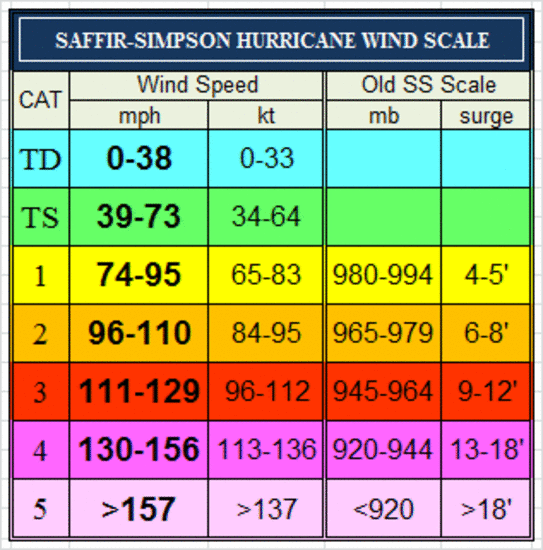

In [41]:
display(Image(filename='scale.png'))

# Define the intensity categories and their corresponding labels

In [42]:
categories = [(1, 33), (34, 63), (64, 82),(83, 95), (96, 112),(113, 136),(137, float('inf'))]
labels = ['Tropical Depression','Tropical Storm','Category 1','Category 2','Category 3', 'Category 4','Category 5+']

In [43]:
predicted_categories = []
for intensity in predictions_rescaled.flatten():
    for i, (min_val, max_val) in enumerate(categories):
        if intensity >= min_val and intensity <= max_val:
            predicted_categories.append(labels[i])
            break

In [44]:
predicted_categories_repeated = np.repeat(predicted_categories, len(data) // len(predicted_categories) + 1)[:len(data)]

In [45]:
data_with_predictions['PREDICTED_INTENSITY_CATEGORY'] = predicted_categories_repeated


In [46]:
new = pd.DataFrame(data_with_predictions)

# WIND SPEED AND PREDICTED WIND SPEED

In [47]:
new[['WIND','PREDICTED_WIND_SPEED']].tail(50)

,WIND,PREDICTED_WIND_SPEED
367090,107,106.020065
367091,105,105.885117
367092,105,104.298050
367093,105,104.803665
367094,105,105.322021
367095,105,105.595718
367096,105,105.617554
367097,105,105.605804
367098,105,105.620865
367099,105,105.574173


# Accuracy Graph

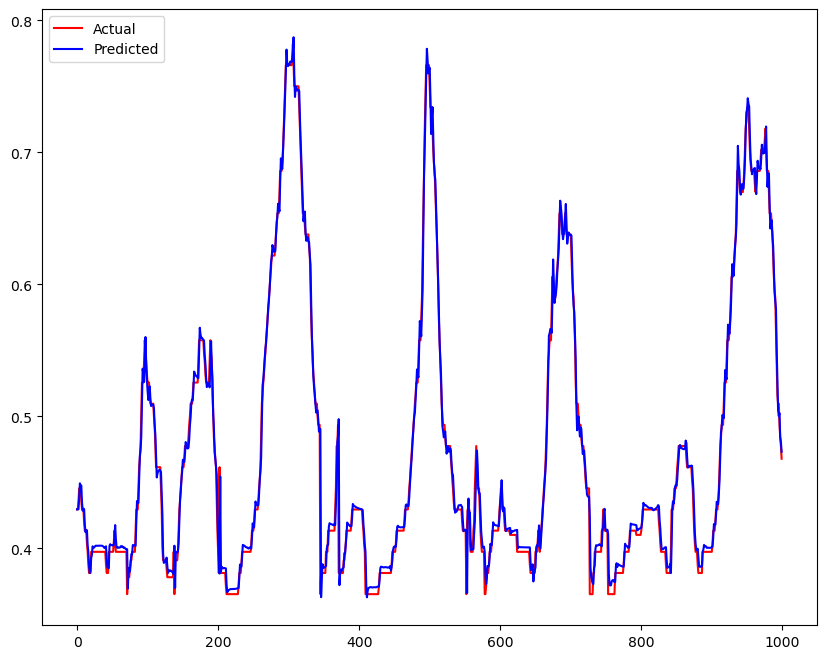

In [48]:
plt.figure(figsize=(10,8))
plt.plot(y_test[:1000], color='red') 
plt.plot(predictions[:1000], color='blue')
# plt.title('model accuracy')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.savefig('plot1.png')
plt.show()

# Actual wind speed and Predicted wind speed

In [51]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print('Train Mean Squared Error:', train_mse)
print('Train Mean Absolute Error:', train_mae)
print('Test Mean Squared Error:', test_mse)
print('Test Mean Absolute Error:', test_mae)

2026/2026 [==============================] - 17s 9ms/step
Train Mean Squared Error: 0.00011590102
Train Mean Absolute Error: 0.0059960955
Test Mean Squared Error: 8.480401e-05
Test Mean Absolute Error: 0.0057077445
